# Visual EDA

In [132]:
#General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

#Hiding Pink Warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [133]:
data = pd.read_csv('../data/edited_data.csv')

#### Replacing fire emoji with ' emote_fire ' so CountVectorizer() treats it as a word, using token patterns that prevent emojis from being filtered also allow other symbols such as "/" or "-" to be counted as words. The space on either side of the ' emote_fire ' ensures that each 🔥 is treated as a unique word for the sake of exploratory analysis.

In [134]:
data['title'] = data['title'].str.replace('🔥',' emote_fire ')
data.tail(5)

,subreddit,selftext,title,title_length,title_word_count
9991,NatureIsFuckingLit,NaN,emote_fire Trio of Hyacinth Macaws,25,5
9992,NatureIsFuckingLit,NaN,Beautiful mountains,19,2
9993,NatureIsFuckingLit,NaN,emote_fire Eagle flying with a camera,28,6
9994,NatureIsFuckingLit,NaN,Art,3,1
9995,NatureIsFuckingLit,NaN,"Anxiety healing, relaxing nature &amp; calming...",54,7


In [135]:
#Creating title datasets grouped by subreddit
X = data['title'] #Both subreddits
lit = data['title'][data['subreddit']=="NatureIsFuckingLit"] #Only titles from NatureIsFuckingLit
metal = data['title'][data['subreddit']=="natureismetal"] #Only titles from NatureIsMetal

#Instantiating Count Vectorizers
cv1 = CountVectorizer(lowercase=True,stop_words='english',min_df=3)
cv2 = CountVectorizer(lowercase=True,stop_words='english',min_df=3)
cv3 = CountVectorizer(lowercase=True,stop_words='english',min_df=3)

#transforming data into dummy columns representing each word
X_cv = cv1.fit_transform(X).A
lit_cv = cv2.fit_transform(lit).A
metal_cv = cv3.fit_transform(metal).A

#Getting feature names from each CountVectorizer
feature_names1 = cv1.get_feature_names_out()
feature_names2 = cv2.get_feature_names_out()
feature_names3 = cv3.get_feature_names_out()

X_cv = pd.DataFrame(X_cv, columns=feature_names1)
lit_cv = pd.DataFrame(lit_cv, columns=feature_names2)
metal_cv = pd.DataFrame(metal_cv, columns=feature_names3)

In [136]:
X_cv.sum().sort_values(ascending=False).head(10)

emote_fire    3367
nature         315
tree           288
oc             281
like           219
eating         217
bird           209
park           207
hawk           198
fish           189
dtype: int64

In [137]:
X_cv.sum().sort_values(ascending=False).head(10)
lit_cv.drop(columns='emote_fire').sum().sort_values(ascending=False).head(10)
metal_cv.sum().sort_values(ascending=False).head(10);

In [138]:
sns.set_palette('inferno')
sns.set_style('white')

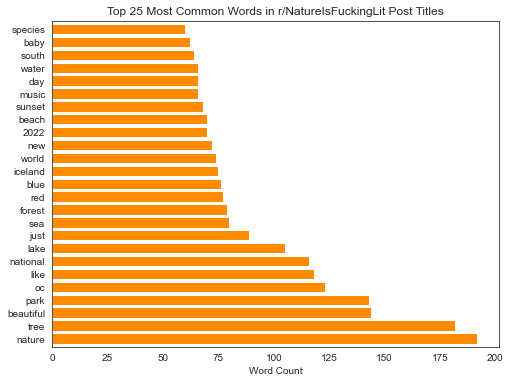

In [139]:
plt.figure(figsize=(8,6),facecolor='none')
lit_cv.drop(columns='emote_fire').sum().sort_values(ascending=False).head(25).plot(kind='barh',color='darkorange',width=0.8)
plt.xlabel('Word Count')
plt.title('Top 25 Most Common Words in r/NatureIsFuckingLit Post Titles');
plt.savefig('../figures/top25_natureisfuckinglit.png')

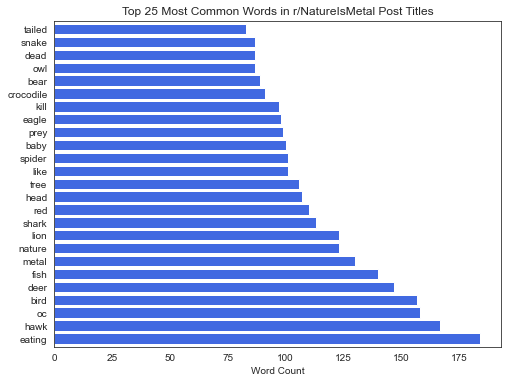

In [140]:
plt.figure(figsize=(8,6),facecolor='none')
metal_cv.sum().sort_values(ascending=False).head(25).plot(kind='barh',color=['royalblue'],width=0.8);
plt.xlabel('Word Count')
plt.title('Top 25 Most Common Words in r/NatureIsMetal Post Titles')
plt.savefig('../figures/top25_natureismetal.png')

#### Displays the words that are part of both subreddit's top 25 most common words

In [141]:
(metal_cv.sum().sort_values(ascending=False).head(25) & lit_cv.sum().sort_values(ascending=False).head(25))[
    (metal_cv.sum().sort_values(ascending=False).head(25) & lit_cv.sum().sort_values(ascending=False).head(25))==True
]

baby      True
like      True
nature    True
oc        True
red       True
tree      True
dtype: bool

#### Plotting the distribution of word frequencies

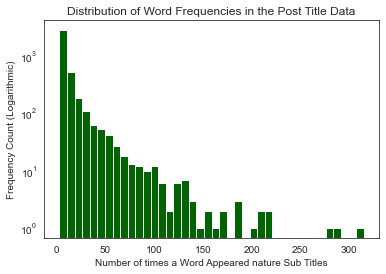

In [174]:
plt.hist(X_cv.sum().drop('emote_fire').sort_values(ascending=False),bins=40,log=True,color='darkgreen');
plt.xlabel('Number of times a Word Appeared nature Sub Titles')
plt.ylabel('Frequency Count (Logarithmic)')
plt.title('Distribution of Word Frequencies in the Post Title Data');
plt.savefig('../figures/word_frequency_distribution.png')

### Coefs from Grid Search Logistic Regression w/CV model

#### Inputted manually because jupyter crashed and I do not want to re-run the modeling.ipynb file in order to keep its outputs displayed on github

In [142]:
coefs = pd.DataFrame({
    'word':['metal','tooth','catfish','zebra','tonga','dead','music relaxation sounds','devouring','kill','kills',
           'albino','complete','switzerland','easily','iceland','cloud','arizona','sunset','guide','lit'],
    'coef':[2.826435,2.145678,2.073406,2.021246,1.928061,1.874156,1.729165,1.638292,1.633893,1.633165,
            -1.314921,-1.335531,-1.449784,-1.470822,-1.498355,-1.499521,-1.576918,-1.664141,-1.795370,-1.933484]  
})
coefs

,word,coef
0,metal,2.826435
1,tooth,2.145678
2,catfish,2.073406
3,zebra,2.021246
4,tonga,1.928061
5,dead,1.874156
6,music relaxation sounds,1.729165
7,devouring,1.638292
8,kill,1.633893
9,kills,1.633165


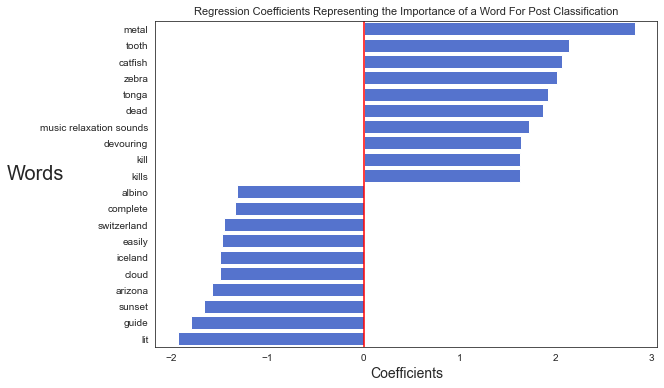

In [143]:
plt.figure(figsize=(9,6))
coef_plot = sns.barplot(data=coefs,y="word",x="coef",color='royalblue')
coef_plot.axvline(x=0,color='red')
plt.ylabel('Words', rotation=0,fontsize=20)
plt.xlabel('Coefficients',fontsize=14)
plt.title('Regression Coefficients Representing the Importance of a Word For Post Classification',fontsize=11)
plt.savefig('../figures/coefficients.png')